In [1]:
# jupyter settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Surface code: 2x2 cell as a basic building block?
2x2 unit cell

Only the readout stage, no encoding stage:

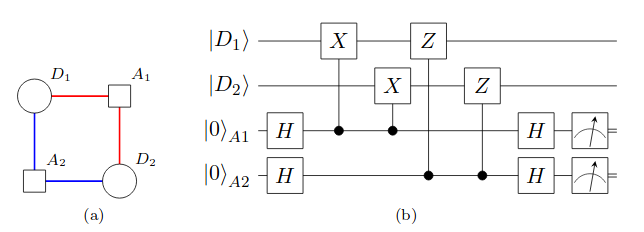

red: X Stabilizer measurement

blue: Z Stabilizer measurement

image source: Review paper from J. Roffe: https://arxiv.org/pdf/1907.11157.pdf#page=17

In [4]:
import numpy as np
from qiskit import *

%matplotlib inline

class MinimalCircuit: 
    # TODO: make a class to instantiate 2x2 basic building block circuits, copy them, connect them up, ...
    def __init__(self, x_counter, y_counter, name=None):
        if not name: 
            # create a name for the new quantum register 
            # and the new classical register
            self.qc_name = "mc(" + str(x_counter) + "," + str(y_counter) + ")"
            self.qr_name = "qr." + self.qc_name
            self.cr_name = "cr." + self.qc_name
        
        # Create a new Quantum Circuit
        self.qr = QuantumRegister(size=4, name=self.qr_name)
        self.cr = ClassicalRegister(size=2, name=self.cr_name)
        self.qc = QuantumCircuit(self.qr, self.cr, name=self.qc_name)
    
        
        # --- measure phase-flip detecting stabilizers: X's ---
        # measure X_D1 X_D2 -> A1
        self.qc.barrier()
        self.qc.h(self.qr[2])
        # A1, D1
        self.qc.cx(self.qr[2],self.qr[0])
        # A1, D2
        self.qc.cx(self.qr[2],self.qr[1])
        self.qc.h(self.qr[2])
        self.qc.measure(self.qr[2],self.cr[0])
        
        # --- measure bit-flip detecting stabilizers: Z's ---
        # measure Z_D1 Z_D3 Z_D4 -> A2

        self.qc.barrier()
        self.qc.h(self.qr[3])
        self.qc.cz(self.qr[3],self.qr[0])
        self.qc.cz(self.qr[3],self.qr[1])
        self.qc.h(self.qr[3])
        self.qc.measure(self.qr[3],self.cr[0])
        
c = MinimalCircuit(0,0)
# drawing the circuit
c.qc.draw(fold=90)

c2 = MinimalCircuit(0,1)
c2.qc.draw(fold=90)


ImportError: No module named qiskit

In [3]:
# combine multiple MinimalCircuits
# one could try to write a for loop connecting up the 2x2 blocks

# test: simple addition of circuits
new_qc = c.qc + c2.qc

# c.qr[0] = c2.qr[1]  # how to set two qubits from two different circuits eqal? This is too naive.

new_qc.draw(fold=90)

NameError: name 'c' is not defined